This analysis explores a dataset of Apple App Store applications to uncover insights about app categories, monetization models, and user ratings. The key objectives are:

- Identify and remove duplicate app records.
- Filter apps with English names.
- Analyze distribution of apps across different genres.
- Compare user ratings and rating counts by genre.
- Examine the relationship between app ratings and popularity.
- Segment apps into Free vs. Paid monetization categories.
- Highlight top-rated apps and analyze their characteristics.
- Visualize monetization distribution by genre.
- Compare rating distributions between Free and Paid apps.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'/content/AppleStore.csv')

In [5]:
#Quick exploration of App Store data
df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df.shape

(7197, 17)

In [92]:
# Count the occurances of each unique app name
app_count = df['track_name'].value_counts()
duplicate_apps = app_count[app_count>1]
total_duplicates = duplicate_apps.sum() - len(duplicate_apps)

print('Number of duplicate apps ',total_duplicates)

Number of duplicate apps  2


In [ ]:
# Identify duplicate rows based on the "track_name" column
duplicate_rows = df[df.duplicated(subset='track_name',keep=False)]

grouped_duplicates = duplicate_rows.groupby('track_name')

for name, group in grouped_duplicates:
  print(f'App:{name}')
  print(group)

In [9]:
# sorting and removing duplicates based on "track_name" while retaining the one with highest rating
df2 = df.sort_values(by='track_name', ascending=False).drop_duplicates(subset='track_name',keep='first')

In [10]:
df2.shape

(7195, 17)

In [11]:
# Paid apps
df_paid = df[df['price']!=0]
df_paid.shape

(3141, 17)

In [91]:
# Defining pattern to match english-like text
import re
pattern = r'[\w\s.,!?;+*-_/()\[\]{}@#%&]+$'

df_filtered = df2[df2['track_name'].str.match(pattern)]
df_filtered.shape

(6186, 17)

In [13]:
apple_prime_genre_counts = df_filtered['prime_genre'].value_counts(normalize=True)

top_10_prime_genres = apple_prime_genre_counts.head(10).reset_index()
top_10_prime_genres

,prime_genre,proportion
0,Games,0.540737
1,Entertainment,0.072583
2,Education,0.060782
3,Photo & Video,0.053185
4,Utilities,0.036857
5,Productivity,0.025865
6,Health & Fitness,0.023925
7,Social Networking,0.022632
8,Music,0.021662
9,Lifestyle,0.018105


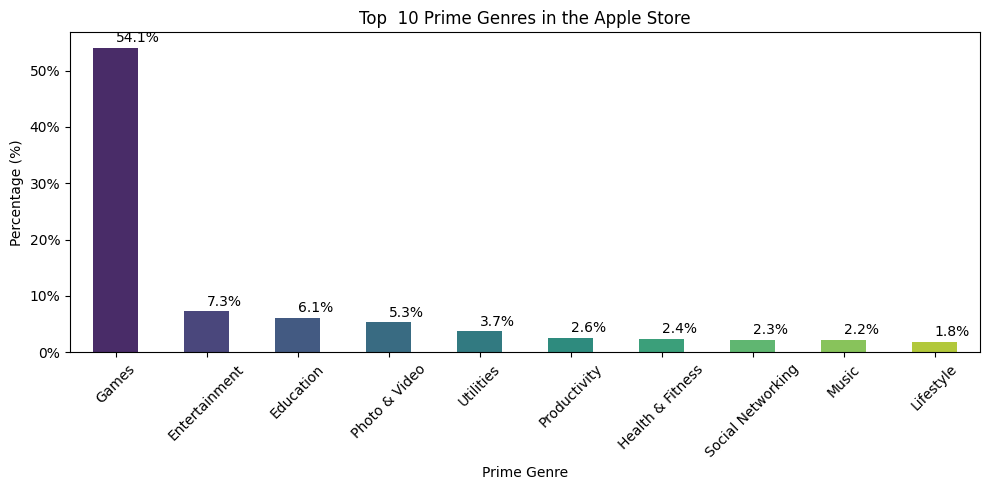

In [89]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,5))
barplot = sns.barplot(x='prime_genre', y='proportion',data=top_10_prime_genres, palette= sns.color_palette('viridis', 10),hue='prime_genre',width=0.5)

for p in barplot.patches:
  height = p.get_height()
  barplot.annotate(f'{height*100:.1f}%',(p.get_x()+p.get_width()/2, height+0.01))

plt.xlabel('Prime Genre')
plt.ylabel('Percentage (%)')
plt.title('Top  10 Prime Genres in the Apple Store')
plt.xticks(rotation=45)
barplot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

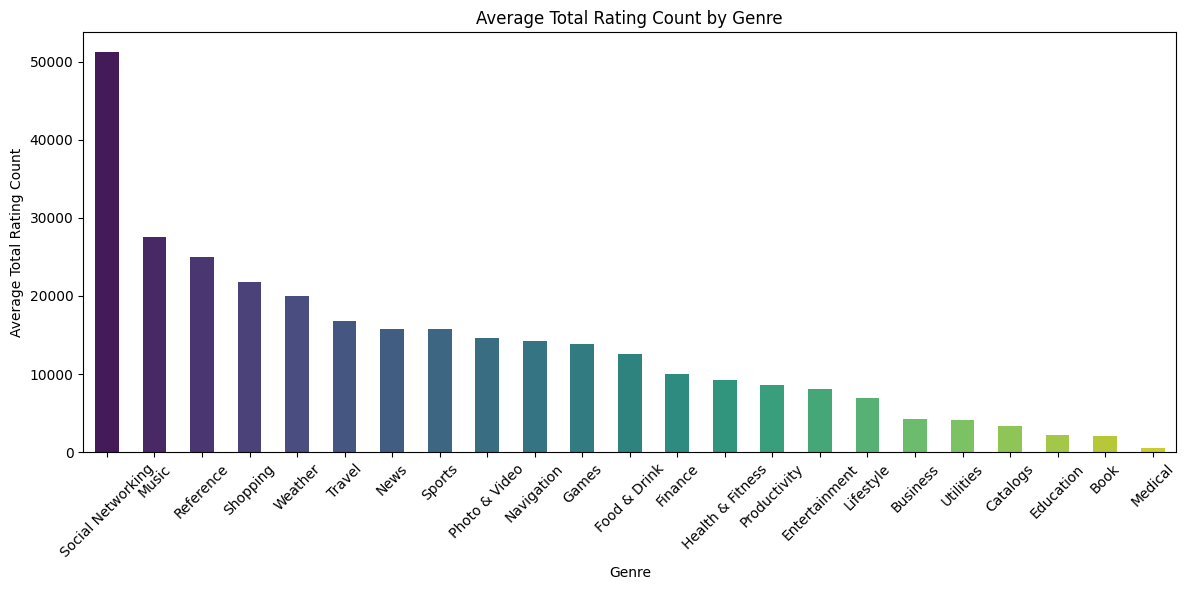

In [57]:
# Average Total rating count by Genre
avg_rating_count_tot = df_filtered.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_count_tot.index, y=avg_rating_count_tot.values,width=0.5,palette=sns.color_palette('viridis',23), hue=avg_rating_count_tot.index)
plt.title('Average Total Rating Count by Genre')
plt.ylabel('Average Total Rating Count')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

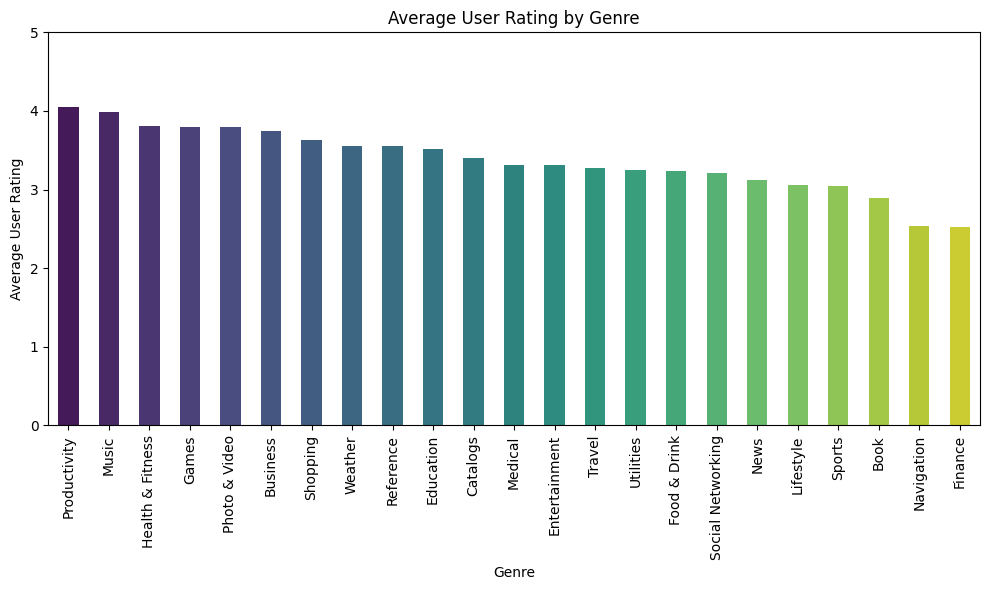

In [58]:
# Average User Rating by Genre
avg_user_rating = df_filtered.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_user_rating.index, y=avg_user_rating.values,width=0.5,palette=sns.color_palette('viridis',23),hue=avg_user_rating.index )
plt.title('Average User Rating by Genre')
plt.ylabel('Average User Rating')
plt.xlabel('Genre')
plt.ylim(0, 5)  # Ratings are typically on a 0-5 scale
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

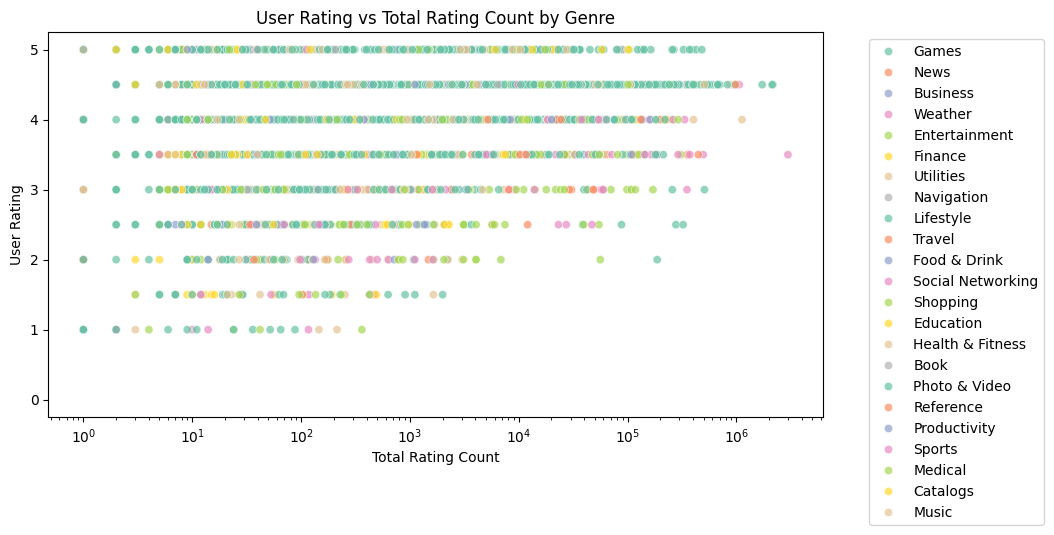

In [24]:
#User Rating vs Total Rating Count by Genre
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='rating_count_tot', y='user_rating', hue='prime_genre', alpha=0.7,palette='Set2')
plt.title('User Rating vs Total Rating Count by Genre')
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating')
plt.xscale('log')  # Log scale can help visualize skewed data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Create the 'monetization' column: Free or Paid
df_filtered['monetization'] = np.where(df_filtered['price'] == 0, 'Free', 'Paid')

# Choose the appropriate user rating column
if 'user_rating' in df_filtered.columns:
    rating_col = 'user_rating'
else:
    rating_col = 'user_rating_ver'

rating_threshold = 4.8
# Filter top-rated apps
top_rated_apps = df_filtered[df_filtered[rating_col] >= rating_threshold]

In [26]:
print('Number of top-rated apps:', top_rated_apps.shape[0])

Number of top-rated apps: 424


In [27]:
# Create Genre Summary for Top-Rated Apps
genre_summary = top_rated_apps.groupby('prime_genre').agg(no_of_apps= ('prime_genre','count'),
                                                           avg_rating = (rating_col,'mean'),
                                                           avg_price =('price','mean'),
                                                           avg_rating_count =('rating_count_tot','mean'),
                                                          monetization_distribution=('monetization', lambda x: x.value_counts(normalize=True).to_dict())).reset_index()

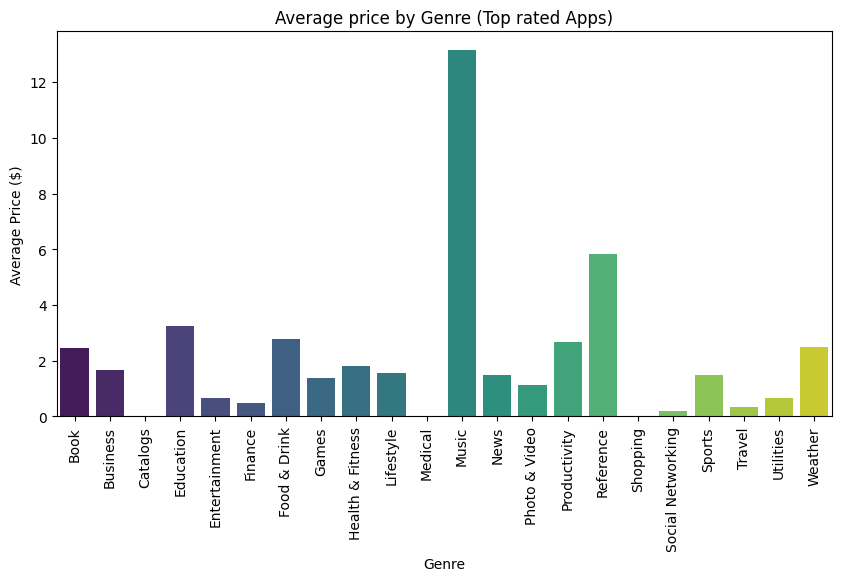

In [59]:
# Average Price by Genre
plt.figure(figsize=(10,5))
sns.barplot(x='prime_genre', y='avg_price',data=genre_summary, palette = sns.color_palette('viridis',22), hue='prime_genre')
plt.title('Average price by Genre (Top rated Apps)')
plt.xlabel('Genre')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

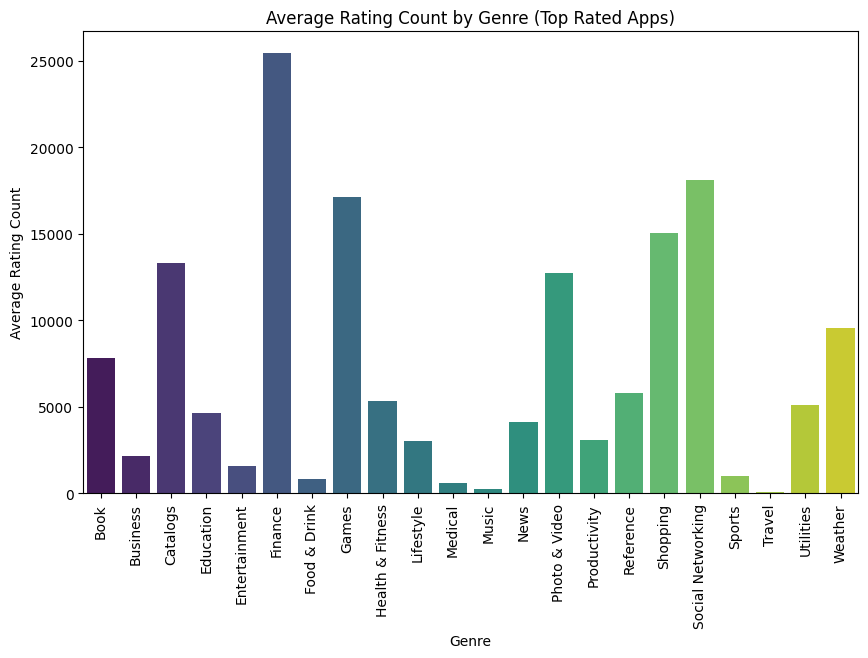

In [60]:
# Average Rating Count by Genre
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='avg_rating_count', data=genre_summary, palette='viridis', hue='prime_genre')
plt.xticks(rotation=90)
plt.title('Average Rating Count by Genre (Top Rated Apps)')
plt.xlabel('Genre')
plt.ylabel('Average Rating Count')
plt.show()

In [30]:
# Create a new DataFrame for monetization distribution
monetization_dist = pd.DataFrame(genre_summary['monetization_distribution'].tolist(), index=genre_summary['prime_genre'])
monetization_dist = monetization_dist.fillna(0)

<Figure size 1500x600 with 0 Axes>

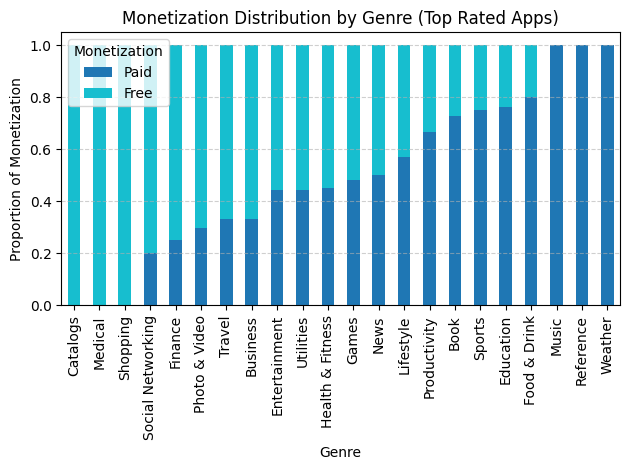

In [31]:
monetization_dist_sorted = monetization_dist.sort_values('Free', ascending=False)

# Plot monetization distribution
plt.figure(figsize=(15,6))
monetization_dist_sorted.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Monetization Distribution by Genre (Top Rated Apps)')
plt.xlabel('Genre')
plt.ylabel('Proportion of Monetization')
plt.legend(title='Monetization')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

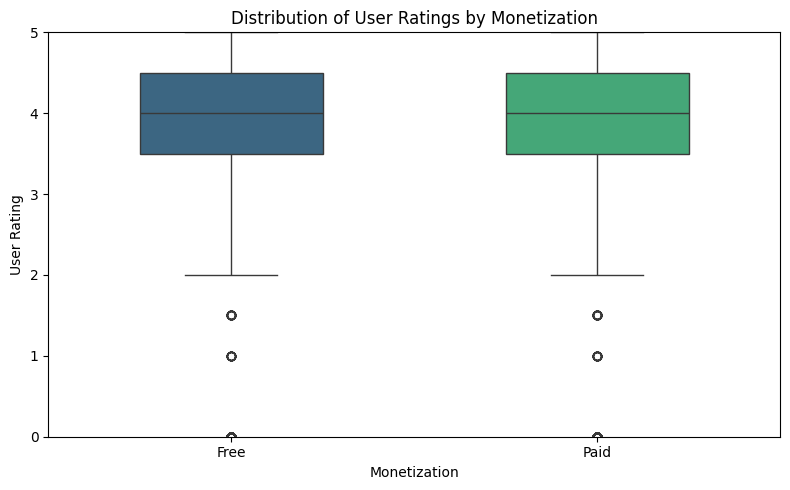

In [84]:
# Visualization: Compare Ratings Distribution by Monetization
plt.figure(figsize=(8, 5))
sns.boxplot(x='monetization', y=rating_col, data=df_filtered, palette= sns.color_palette('viridis', 2),hue='monetization', width=0.5)
plt.title('Distribution of User Ratings by Monetization')
plt.xlabel('Monetization')
plt.ylabel('User Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

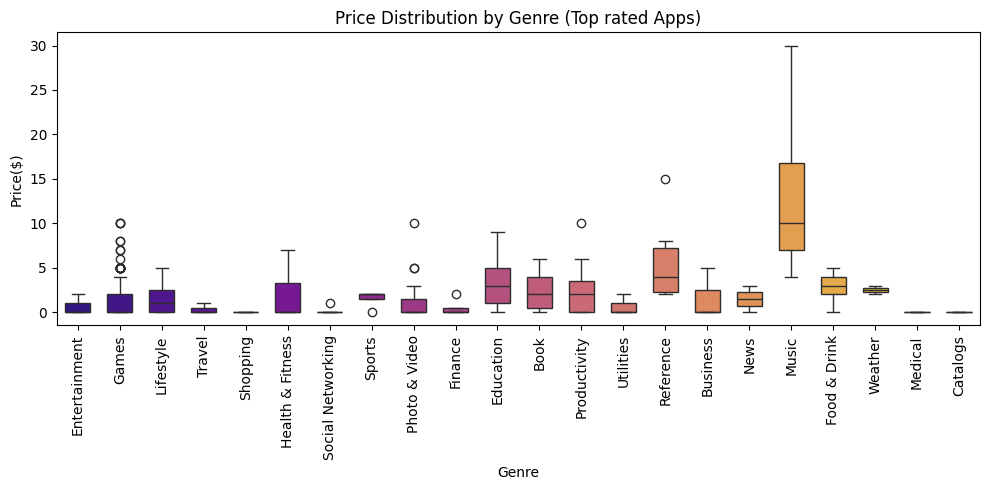

In [88]:
df_filtered = df_filtered.copy()
df_filtered['top_rated'] = np.where(df_filtered[rating_col]>= 4.8, 1, 0)

plt.figure(figsize=(10,5))
sns.boxplot(x='prime_genre', y='price',data= df_filtered[df_filtered['top_rated']==1], palette= sns.color_palette('plasma',22),hue='prime_genre',width=0.6)
plt.title('Price Distribution by Genre (Top rated Apps)')
plt.xlabel('Genre')
plt.ylabel('Price($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()